In [1]:
import pandas as pd
import os

In [2]:
recs = []
for f in os.listdir('retrieved_products'):
    with open(f'retrieved_products/{f}', 'r') as fin:
        for i in fin:
            try:
                query = i.split(',"')[0]
                split = i.split(',"')[1].split('",')[0]
                products = eval(i.split(',"')[1].split('",')[1])
                recs.append({
                    'file': f, 
                    'query': query, 
                    'split': split, 
                    'products': products
                })
            except:
                pass
df = pd.DataFrame(recs)

In [3]:
df_group = df.groupby(['file', 'query']).agg({
    'split': lambda x: [i for i in x],
    'products': lambda x: [i for i in x]
}).reset_index()

In [4]:
df_group.split.apply(lambda x: x[0] == 'control').all()

True

In [5]:
def calc_jaccard(x, y):
    if len(x) == 0 or len(y) == 0:
        return 1. 
    else:
        return len(set(x).intersection(set(y))) / len(set(x).union(set(y)))

In [6]:
df_group['jaccard_top10'] = df_group['products'].apply(lambda x: calc_jaccard(x[0], x[1]))

<AxesSubplot: ylabel='Frequency'>

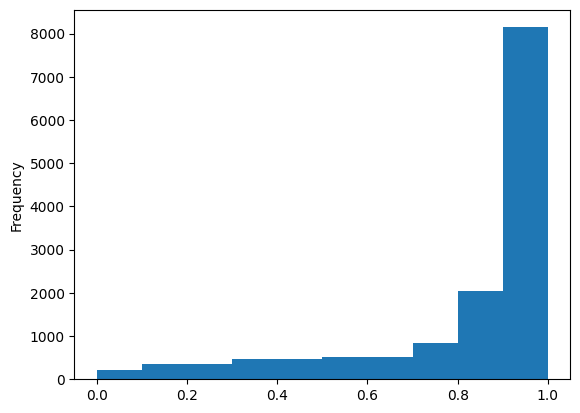

In [7]:
df_group.jaccard_top10.plot.hist()

<AxesSubplot: ylabel='file'>

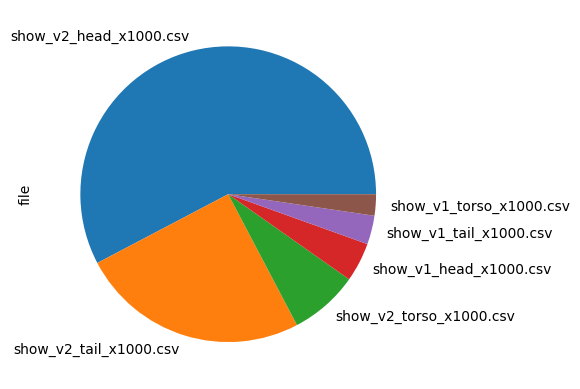

In [10]:
df_group[df_group['jaccard_top10'] < .5].file.value_counts().plot.pie()

In [12]:
df_group_sample = df_group[df_group['jaccard_top10'] < .2].groupby('file').sample(20, random_state=42)

In [13]:
df_group_sample

,file,query,split,products,jaccard_top10
1984,show_v1_head_x1000.csv,US_1_woman dress,"[control, show-v1]","[[60fe1d2ed25d8ff937972f32, 5e96f2272acfce091b...",0.116279
1021,show_v1_head_x1000.csv,US_1_android,"[control, show-v1]","[[63aaf4b98eead43909cb0527, 63b6d75f8b205e8fd7...",0.099448
21,show_v1_head_x1000.csv,US_0_android,"[control, show-v1]","[[63aaf4b98eead43909cb0527, 63b6d75f8b205e8fd7...",0.100559
984,show_v1_head_x1000.csv,US_0_woman dress,"[control, show-v1]","[[5e96f2272acfce091bc80052, 60fe1d2ed25d8ff937...",0.096591
2027,show_v1_head_x1000.csv,US_2_apple,"[control, show-v1]","[[5dd71a00dd0c38cb85a85e49, 5e1659e41df5f12940...",0.183432
...,...,...,...,...,...
13482,show_v2_torso_x1000.csv,US_1_make up carrier,"[control, show-v2]","[[60e81e5302d3fbb51330b8fe, 5fe9aee8d36593885b...",0.169591
13354,show_v2_torso_x1000.csv,US_1_gems,"[control, show-v2]","[[5edb13cb74d2112c99b45d17, 5e6cb10444bbc002a2...",0.156977
13054,show_v2_torso_x1000.csv,US_1_atomiser,"[control, show-v2]","[[6073f995c187127fe8f199ae, 622c41ed488cb48392...",0.104972
13829,show_v2_torso_x1000.csv,US_1_vhs player for sale,"[control, show-v2]","[[6398c7f7b70aafff070fb2fd, 5f0581335982944586...",0.015306


In [14]:
display_recs = []
for i in df_group_sample.to_dict('records'):
    for ind in range(10):
        if ind > len(i['products'][0])-1:
            i[f'control_product_{ind}'] = None 
        else:
            pid = i['products'][0][ind]
            i[f'control_product_{ind}'] = pid # f"""=HYPERLINK("https://www.wish.com/product/{pid}", IMAGE("https://canary.contestimg.wish.com/api/webimage/{pid}-small.jpg"))"""
    for ind in range(10):
        if ind > len(i['products'][1])-1:
            i[f'treatment_product_{ind}'] = None 
        else:
            pid = i['products'][1][ind]
            i[f'treatment_product_{ind}'] = pid # f"""=HYPERLINK("https://www.wish.com/product/{pid}", IMAGE("https://canary.contestimg.wish.com/api/webimage/{pid}-small.jpg"))"""

    display_recs.append(i)

In [15]:
df_display = pd.DataFrame(display_recs)

In [16]:
df_display.to_csv('show-v1-v2-modelv3-retrieved_products_review.csv', index=False)

In [17]:
df_display

,file,query,split,products,jaccard_top10,control_product_0,control_product_1,control_product_2,control_product_3,control_product_4,...,treatment_product_0,treatment_product_1,treatment_product_2,treatment_product_3,treatment_product_4,treatment_product_5,treatment_product_6,treatment_product_7,treatment_product_8,treatment_product_9
0,show_v1_head_x1000.csv,US_1_woman dress,"[control, show-v1]","[[60fe1d2ed25d8ff937972f32, 5e96f2272acfce091b...",0.116279,60fe1d2ed25d8ff937972f32,5e96f2272acfce091bc80052,5fadd9089b543b3e8a9ed09b,60c9ddbb02918b391426416e,61cec3e921950d58d0283429,...,60fe1d2ed25d8ff937972f32,61cec3e921950d58d0283429,6321a35cdde7050ba07bd92a,63314961ec3608c6dd8ac06d,5cb031772f17ce01bdc7b227,635110c6c7c4f89ebb36212c,5b03d6fcc25e4b17b7592e98,6109fb1148d2cf2f52ece89b,5fa913ed7953b807e1652bf3,5edf03837104911ce1ca3a8b
1,show_v1_head_x1000.csv,US_1_android,"[control, show-v1]","[[63aaf4b98eead43909cb0527, 63b6d75f8b205e8fd7...",0.099448,63aaf4b98eead43909cb0527,63b6d75f8b205e8fd76f79c1,62bace31908f27388f7afd84,6220bcedb99262a0a3021d74,626f7ca067ea96ea8992bd91,...,6324cf41f5a94ed9d2abb507,6242d4dc4166243fca6985f7,60b5ae167866c5dc463f84d6,62874e38284823074c2123b3,6194e5d1356166c18626c625,62554e9294186373b8e0c6bf,61ad9d312f551851e917caee,62bace31908f27388f7afd84,61b241a3a4ee2ecaf2f63c77,63aaf4b98eead43909cb0527
2,show_v1_head_x1000.csv,US_0_android,"[control, show-v1]","[[63aaf4b98eead43909cb0527, 63b6d75f8b205e8fd7...",0.100559,63aaf4b98eead43909cb0527,63b6d75f8b205e8fd76f79c1,62bace31908f27388f7afd84,6324cf41f5a94ed9d2abb507,626f7ca067ea96ea8992bd91,...,6324cf41f5a94ed9d2abb507,6242d4dc4166243fca6985f7,62874e38284823074c2123b3,6194e5d1356166c18626c625,60b5ae167866c5dc463f84d6,62bace31908f27388f7afd84,62554e9294186373b8e0c6bf,61ad9d312f551851e917caee,624fa22df16e5d935944e2c2,61b241a3a4ee2ecaf2f63c77
3,show_v1_head_x1000.csv,US_0_woman dress,"[control, show-v1]","[[5e96f2272acfce091bc80052, 60fe1d2ed25d8ff937...",0.096591,5e96f2272acfce091bc80052,60fe1d2ed25d8ff937972f32,5fadd9089b543b3e8a9ed09b,6362128480f2fe3e4e515fd0,5e8a9e085a8fce43444a8a41,...,60fe1d2ed25d8ff937972f32,61cec3e921950d58d0283429,6321a35cdde7050ba07bd92a,5cb031772f17ce01bdc7b227,635110c6c7c4f89ebb36212c,63314961ec3608c6dd8ac06d,6109fb1148d2cf2f52ece89b,5fa913ed7953b807e1652bf3,614564fba01ca57c6674ed03,591a9fb849043a3602182949
4,show_v1_head_x1000.csv,US_2_apple,"[control, show-v1]","[[5dd71a00dd0c38cb85a85e49, 5e1659e41df5f12940...",0.183432,5dd71a00dd0c38cb85a85e49,5e1659e41df5f1294079e7af,60346a9650aa853b95dcf0a5,5bd3541ff299e32bf0372340,62970e0440c360718c883ab6,...,5e87511bac14358d38edcc89,5b6f5e3bd50c2924ee537e77,5dd71a00dd0c38cb85a85e49,6036df3f97b944069aa97428,5e1659e41df5f1294079e7af,60346a9650aa853b95dcf0a5,5bd3541ff299e32bf0372340,62970e0440c360718c883ab6,5eaacb79de3c203ab0eb5188,6360bf3a00f06f2c20396bfd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,show_v2_torso_x1000.csv,US_1_make up carrier,"[control, show-v2]","[[60e81e5302d3fbb51330b8fe, 5fe9aee8d36593885b...",0.169591,60e81e5302d3fbb51330b8fe,5fe9aee8d36593885b813ffa,611939585770df16999c3eaa,60b4425dc23fd9cb79a59e17,5f38e71c58887fe2c9150139,...,60f4cec79c065569bb56af2e,6169212328be66fee71e1631,60e81e5302d3fbb51330b8fe,5dc23509fd37ed00e709249a,5e6b877e9251777e885febf1,61d2af3be57d36030db00c0d,611939585770df16999c3eaa,5c78b24e9f99b44f1118c58c,5bb4a9f06b18016ef4e72b4d,5a17e773061be93a980b352f
116,show_v2_torso_x1000.csv,US_1_gems,"[control, show-v2]","[[5edb13cb74d2112c99b45d17, 5e6cb10444bbc002a2...",0.156977,5edb13cb74d2112c99b45d17,5e6cb10444bbc002a224e279,611535477b48f484009b175f,5c81d28d9f49ef36f4ae6107,5ecf68c2bce4854a21810f5c,...,5e6cb10444bbc002a224e279,60bf3d5a818c4e3d0f73ab72,5ed9c6a5c597e325cde73471,5d99e4c50081542cdeb3de82,60f8c5a81b12f798e6405711,5ec8ca7ee34c624318b0f176,61dd2edecb739f13226d2d18,5feeab79785f58b3b0688664,5edb13cb74d2112c99b45d17,5cb7202979525e4e61145528
117,show_v2_torso_x1000.csv,US_1_atomiser,"[control, show-v2]","[[6